# 데이터 불러오기 합치기

In [1]:
import plotly.express as px
from datetime import datetime
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
mpl.rc('axes', unicode_minus=False)
%matplotlib inline

#행사구분데이터(입회비유무)
campaign_master=pd.read_csv('C:/alpa/최진영강사님/data/미니프로젝트/campaign_master.csv')
#18.04 부터 19.03까지 1년동안의 유저의 활동로그
use_log=pd.read_csv('C:/alpa/최진영강사님/data/미니프로젝트/use_log.csv')
#회원구분데이터 
class_master=pd.read_csv('C:/alpa/최진영강사님/data/미니프로젝트/class_master.csv')
#19년 3월 말 시점의 회원데이터
customer_master=pd.read_csv('C:/alpa/최진영강사님/data/미니프로젝트/customer_master.csv')

user_data=customer_master.merge(use_log,on='customer_id',how='left')
user_data_2=user_data.merge(campaign_master,on='campaign_id',how='left')
user_data_3=user_data_2.merge(class_master,on='class',how='left')

data=user_data_3[['customer_id','gender','start_date','end_date','usedate','campaign_id','campaign_name','class','class_name','price','is_deleted']]

C:\Users\heysunn\AppData\Local\Temp\ipykernel_14200\2357064597.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## 기본데이터 만들기

In [2]:

def date(asd):
    return asd.split(' ')[0]

data['start_date']=data['start_date'].apply(date)
data['start_date']=pd.to_datetime(data['start_date'])
data['start_month']=data['start_date'].dt.strftime('%Y%m')
data['start_year']=data['start_date'].dt.strftime('%Y')


C:\Users\heysunn\AppData\Local\Temp\ipykernel_14200\445499827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['start_date']=data['start_date'].apply(date)
C:\Users\heysunn\AppData\Local\Temp\ipykernel_14200\445499827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['start_date']=pd.to_datetime(data['start_date'])
C:\Users\heysunn\AppData\Local\Temp\ipykernel_14200\445499827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [3]:
#use : 가장 최근에 이용한 날짜
use=data.groupby('customer_id')['usedate'].max()
def asd(sd):
    return pd.to_datetime(sd)

use=use.apply(asd)
# useday : 스포츠클럽 이용 기간
useday=(use-data.groupby('customer_id')['start_date'].max()).sort_values(ascending=False)
# 1년 이상된 고객들
over_365=useday[useday>pd.to_timedelta(365,unit='D')]
# 1년 미만인 고객들
under_365=useday[useday<pd.to_timedelta(365,unit='D')]




## 탈퇴회원 데이터 만들기

In [4]:
customer_end=data[data.fillna(1)['end_date']!=1]
customer_end['end_date']=customer_end['end_date'].apply(date)
customer_end['end_date']=pd.to_datetime(customer_end['end_date'])
customer_end['end_month']=customer_end['end_date'].dt.strftime('%Y%m')
customer_end['total_use']=customer_end['end_date']-customer_end['start_date']

# 월 솔팅
customer_end2=customer_end.sort_values(by=['end_month'],ascending=True)

# 탈퇴 회원 중 1년 이상 된 고객
end_over_365=customer_end[customer_end['total_use']>pd.to_timedelta(365,unit='D')]
# 탈퇴 회원 중 1년 미만인 고객
end_under_365=customer_end[customer_end['total_use']<pd.to_timedelta(365,unit='D')]
# 탈퇴 회원 중 19.02월에 탈퇴를 신청한 고객
customer_end_feb=customer_end[customer_end['end_date']=='2019-03-31']



C:\Users\heysunn\AppData\Local\Temp\ipykernel_14200\2342163944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_end['end_date']=customer_end['end_date'].apply(date)
C:\Users\heysunn\AppData\Local\Temp\ipykernel_14200\2342163944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_end['end_date']=pd.to_datetime(customer_end['end_date'])
C:\Users\heysunn\AppData\Local\Temp\ipykernel_14200\2342163944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

### -캠페인별
- 할인율이 적용되지 않는 일반 고객으로 가입하는 경우가 제일 많은 비중을 차지한다.
- 성별과 캠페인의 상관관계는 적다고 할 수 있다.
- 1년을 기준으로 장기회원과 단기회원으로 나눈 결과 전체 및 1년이상 장기회원들에 비해 단기회원들은 저렴한 가격에 스포츠클럽을 이용해 보고 그만둔다.

C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,price
campaign_name,
0_입회비반액할인,252351000
1_입회비무료,159733500
2_일반,1280100000


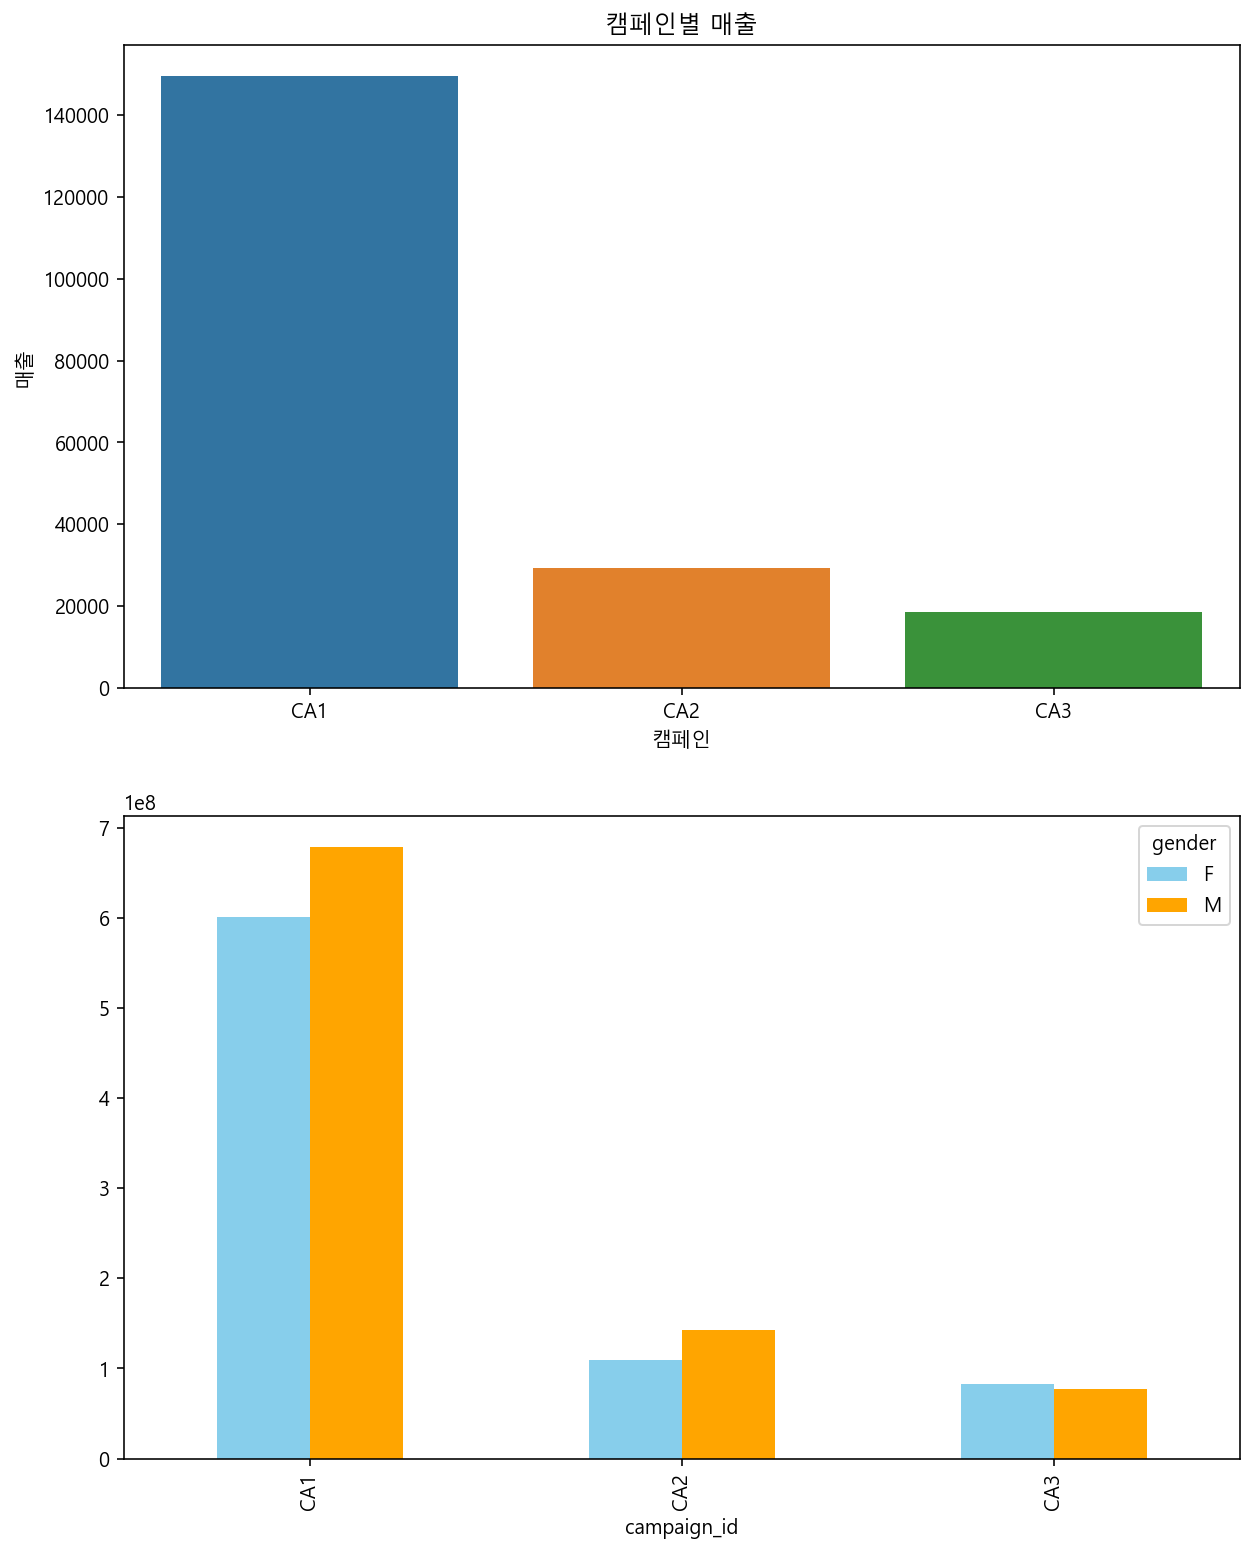

In [5]:
### 캠페인별 매출 
fig = plt.figure(figsize = [10,13])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
campaign_chart=sns.countplot(data['campaign_id'],ax=axes1)
pd.pivot_table(data=data,index='campaign_id',columns='gender',values='price',aggfunc=sum).plot.bar(color=['skyblue','orange'],ax=axes2)

campaign_chart.set_title('캠페인별 매출')
campaign_chart.set_xlabel('캠페인')
campaign_chart.set_ylabel('매출')

#캠페인별 매출
pd.pivot_table(data=data,index='campaign_name',values='price',aggfunc=sum)

gender  campaign_id
F       CA1            6543
        CA2            3516
        CA3            3599
M       CA1            7149
        CA2            5468
        CA3            3199
Name: customer_id, dtype: int64


<AxesSubplot:title={'center':'탈퇴회원 - 성별 캠페인 비율'}, xlabel='campaign_id'>

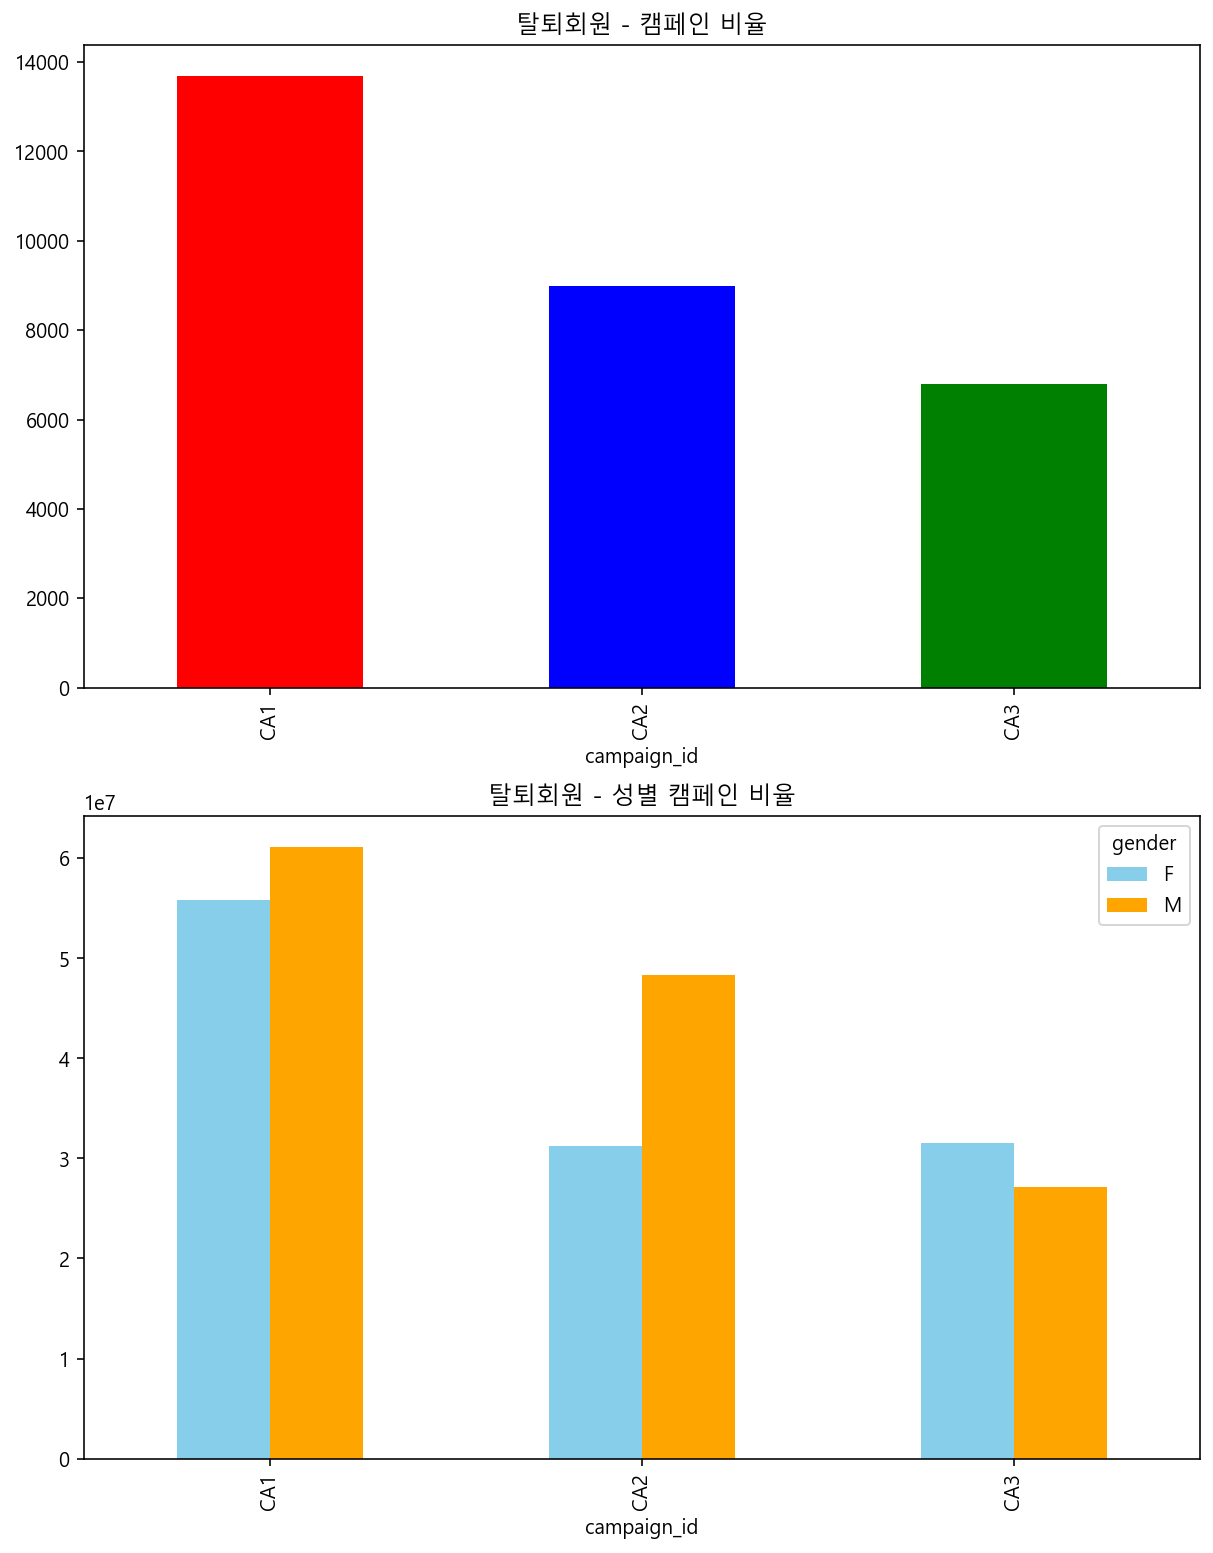

In [6]:
#탈퇴회원 캠페인 비율
fig = plt.figure(figsize = [10,13])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
print(customer_end.groupby(['gender','campaign_id'])['customer_id'].count())
axes1.set_title('탈퇴회원 - 캠페인 비율')
axes2.set_title('탈퇴회원 - 성별 캠페인 비율')
customer_end.groupby(['campaign_id'])['customer_id'].count().plot.bar(color=['r','b','g'],ax=axes1)
pd.pivot_table(data=customer_end,index='campaign_id',columns='gender',values='price',aggfunc=sum).plot.bar(color=['skyblue','orange'],ax=axes2)


gender  campaign_id
F       CA1            2508
        CA2             347
        CA3             299
M       CA1            2219
        CA2             540
        CA3             249
Name: customer_id, dtype: int64


<AxesSubplot:title={'center':'탈퇴회원 - 1년이상 - 성별 캠페인 비율'}, xlabel='campaign_id'>

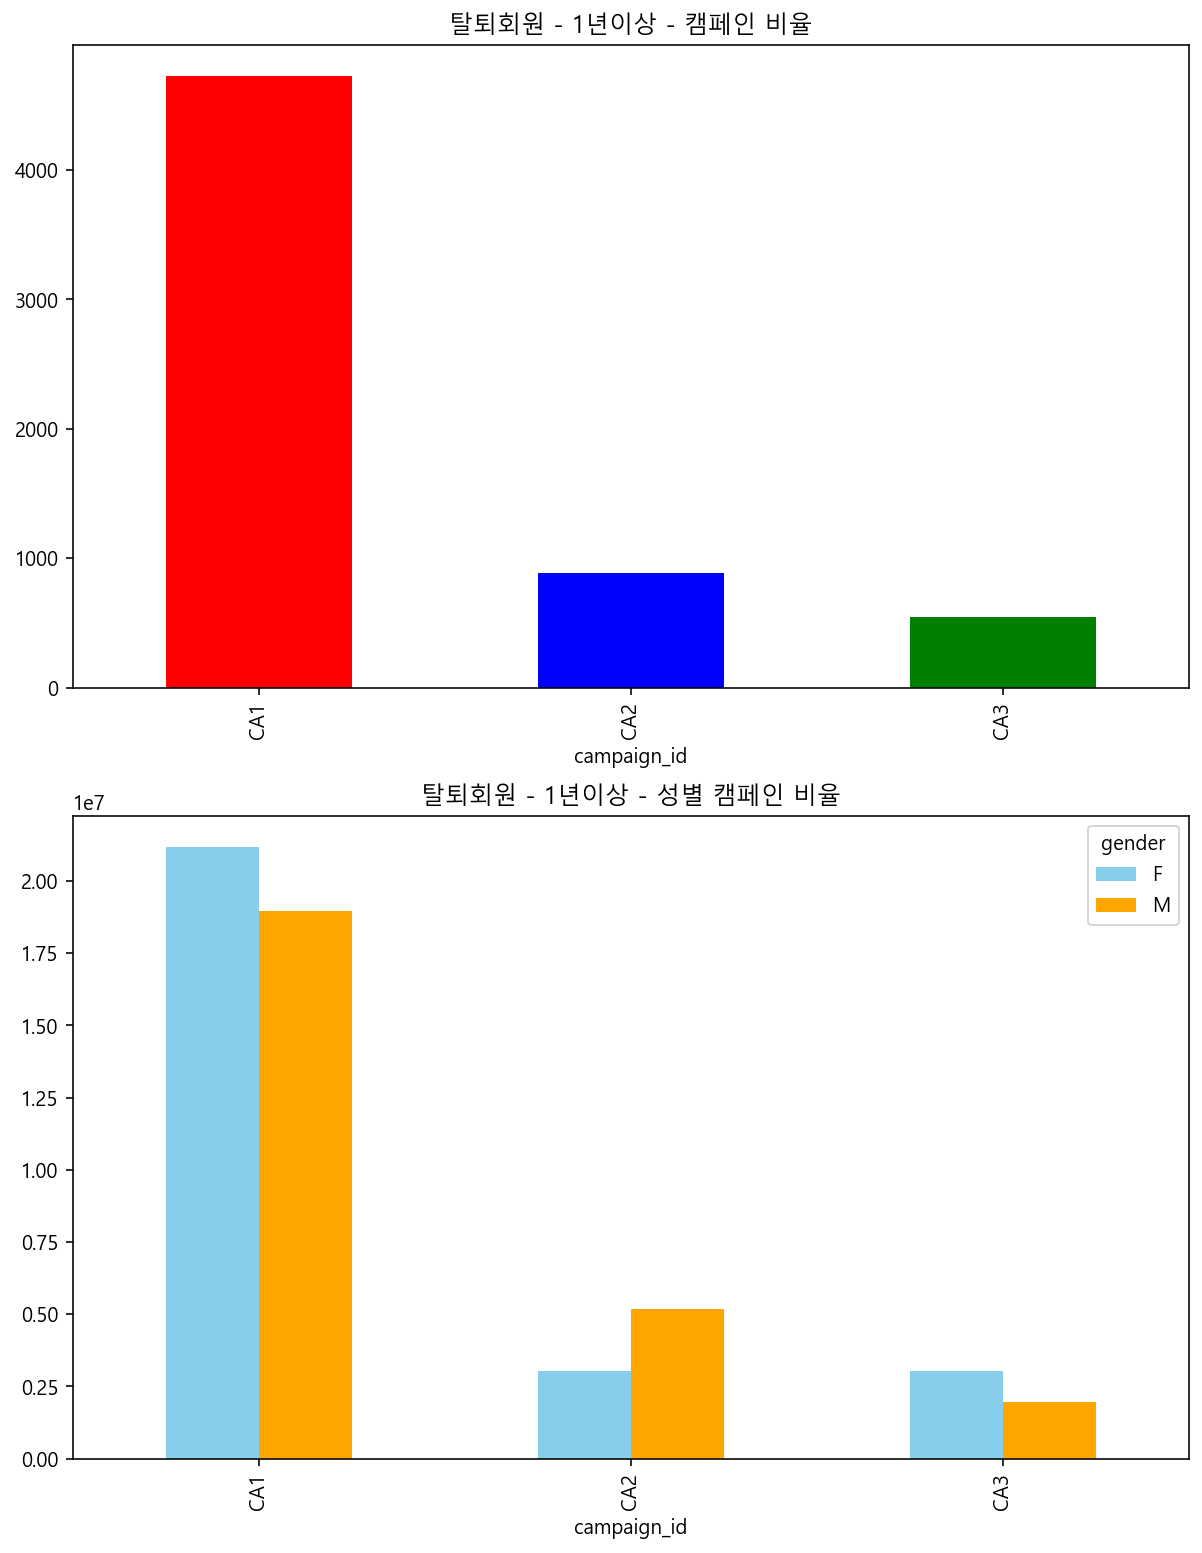

In [7]:
#탈퇴회원 중 1년 이상된 사람들의 캠페인 비율
fig = plt.figure(figsize = [10,13])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
print(end_over_365.groupby(['gender','campaign_id'])['customer_id'].count())
axes1.set_title('탈퇴회원 - 1년이상 - 캠페인 비율')
axes2.set_title('탈퇴회원 - 1년이상 - 성별 캠페인 비율')
end_over_365.groupby(['campaign_id'])['customer_id'].count().plot.bar(color=['r','b','g'],ax=axes1)
pd.pivot_table(data=end_over_365,index='campaign_id',columns='gender',values='price',aggfunc=sum).plot.bar(color=['skyblue','orange'],ax=axes2)

gender  campaign_id
F       CA1            4035
        CA2            3169
        CA3            3300
M       CA1            4930
        CA2            4928
        CA3            2950
Name: customer_id, dtype: int64


<AxesSubplot:title={'center':'탈퇴회원 - 1년미만 - 성별 캠페인 비율'}, xlabel='campaign_id'>

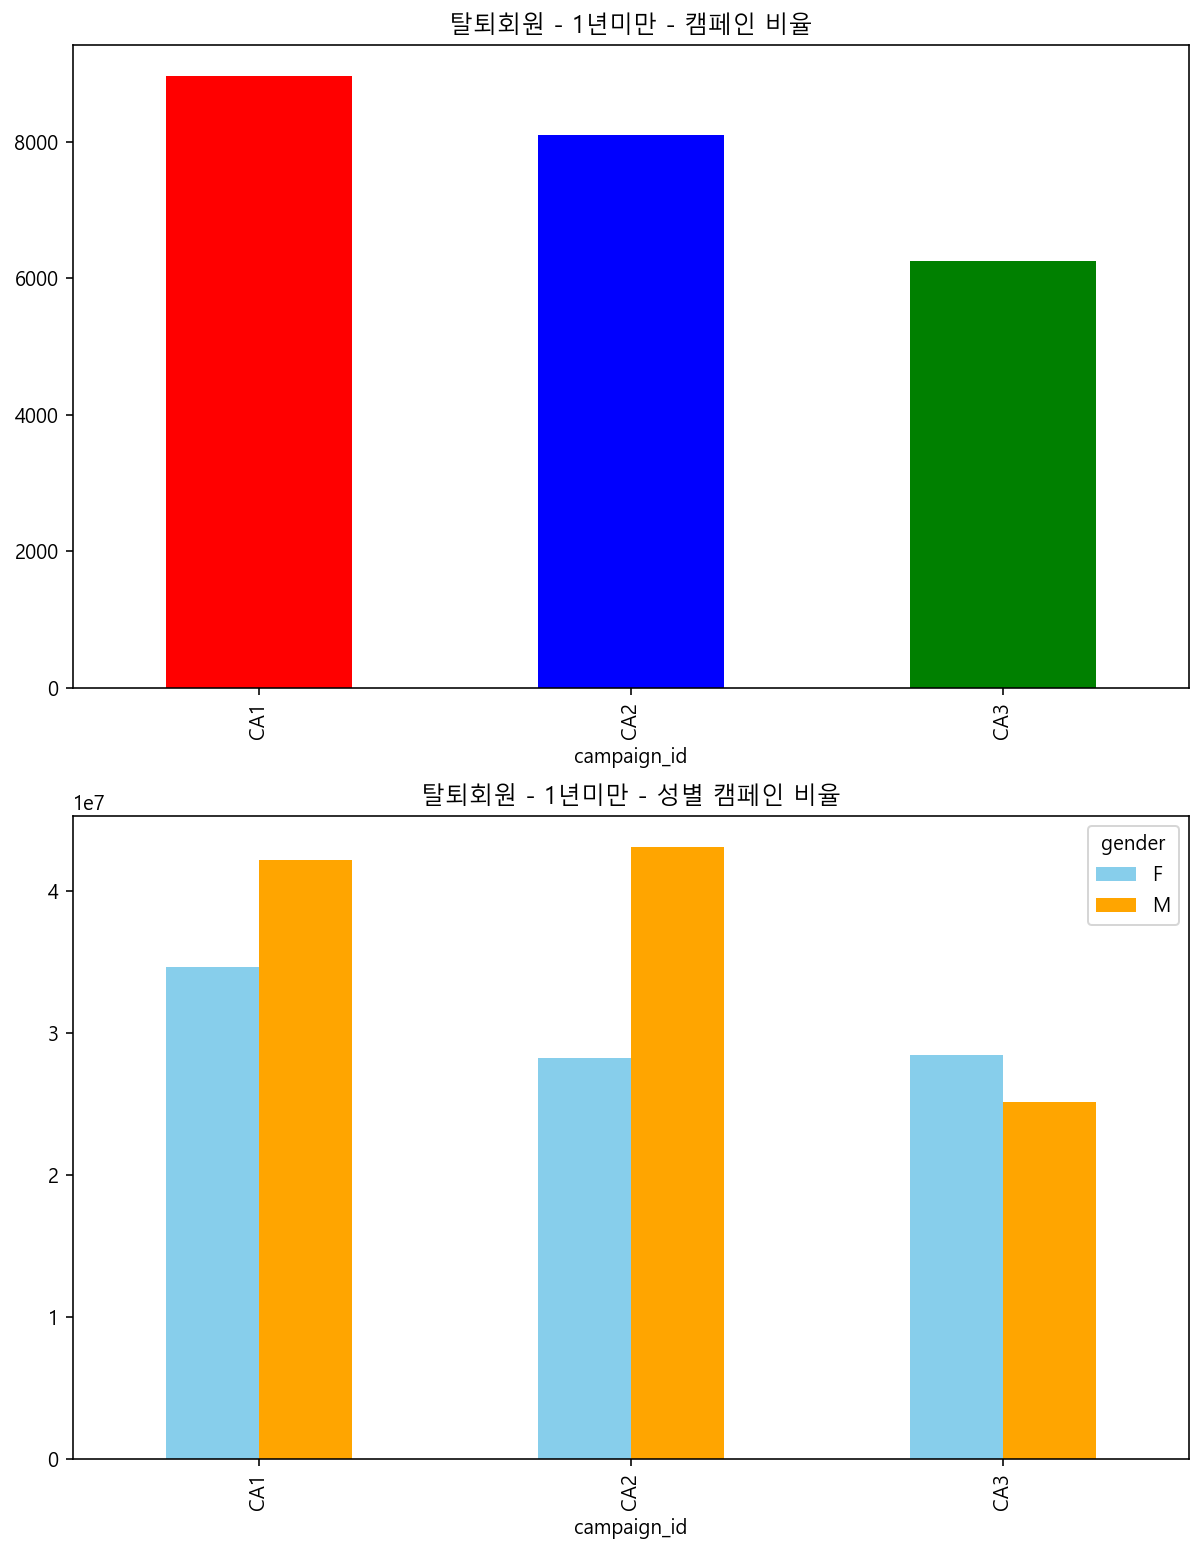

In [8]:
#탈퇴회원 중 1년 미만인 사람들의 캠페인 비율
fig = plt.figure(figsize = [10,13])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
print(end_under_365.groupby(['gender','campaign_id'])['customer_id'].count())
axes1.set_title('탈퇴회원 - 1년미만 - 캠페인 비율')
axes2.set_title('탈퇴회원 - 1년미만 - 성별 캠페인 비율')
end_under_365.groupby(['campaign_id'])['customer_id'].count().plot.bar(color=['r','b','g'],ax=axes1)
pd.pivot_table(data=end_under_365,index='campaign_id',columns='gender',values='price',aggfunc=sum).plot.bar(color=['skyblue','orange'],ax=axes2)

### -클래스별
- 클래스당 가격이 제일 비싼 종일반으로 가장 많은 사람들이 가입하여 매출 비중이 제일 높다.
- 매출 및 회원들의 비율에서 보아 알 수 있듯이 여성들은 주간반을 대체로 선호하고, 남성들은 야간반을 대체로 선호한다.
- 클래스1을 제외한 나머지와 성별간에는 상관관계가 있다.

- 오전반에는 여성을 위한 강좌 개설, 야간에는 남성을 위한 강좌 개설을 하는것이 좋아보인다. 또한 종일반으로 가입하는 사람들이 많기에 성별을 구분하지 않고 모두 쉽고 재밌게 배울 수 있는 강좌를 개설하면 매출에 도움이 될것이다.

C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,price
class,
C01,1018573500
C02,355425000
C03,318186000


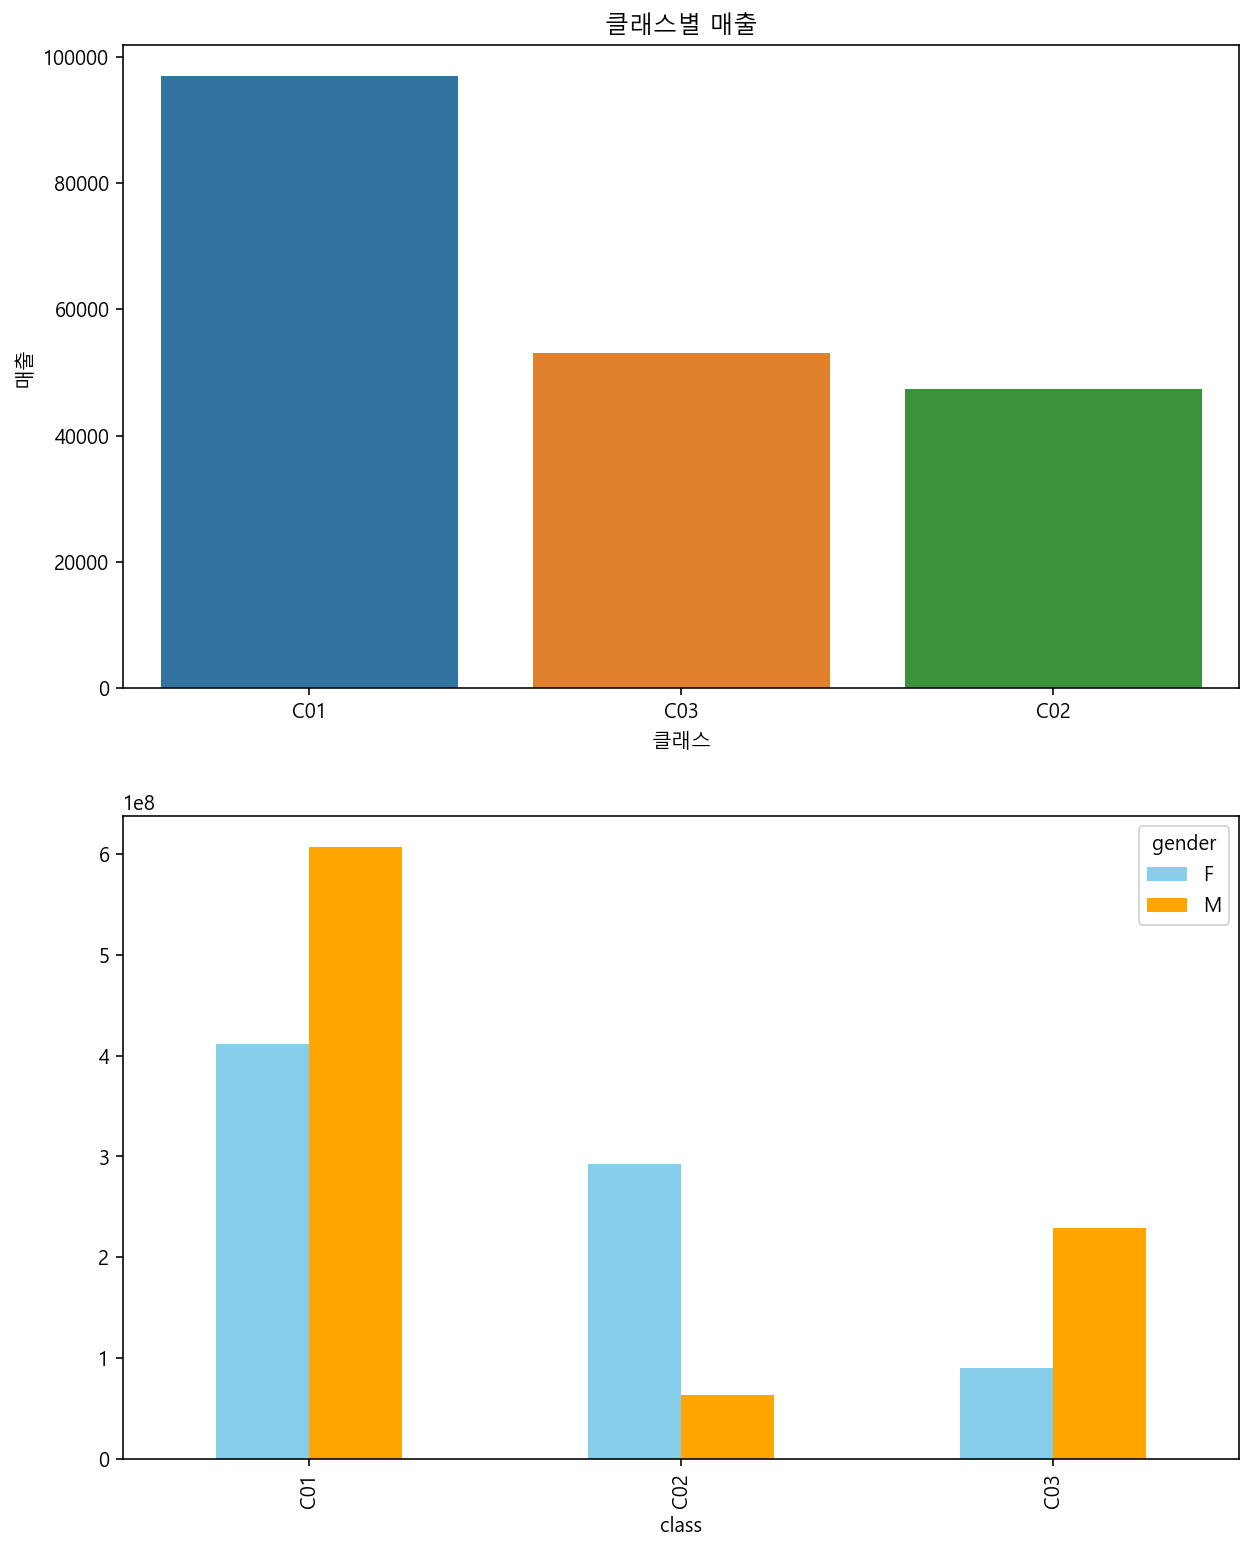

In [9]:
### 클래스별 매출 
fig = plt.figure(figsize = [10,13])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
campaign_chart=sns.countplot(data['class'],ax=axes1)
pd.pivot_table(data=data,index='class',columns='gender',values='price',aggfunc=sum).plot.bar(color=['skyblue','orange'],ax=axes2)
campaign_chart.set_title('클래스별 매출')
campaign_chart.set_xlabel('클래스')
campaign_chart.set_ylabel('매출')

#클래스별 매출
pd.pivot_table(data=data,index='class',values='price',aggfunc=sum)

gender  class
F       C01      39169
        C02      38961
        C03      14933
M       C01      57838
        C02       8429
        C03      38098
Name: customer_id, dtype: int64


<AxesSubplot:title={'center':'전체회원 - 성별 클래스 비율'}, xlabel='class'>

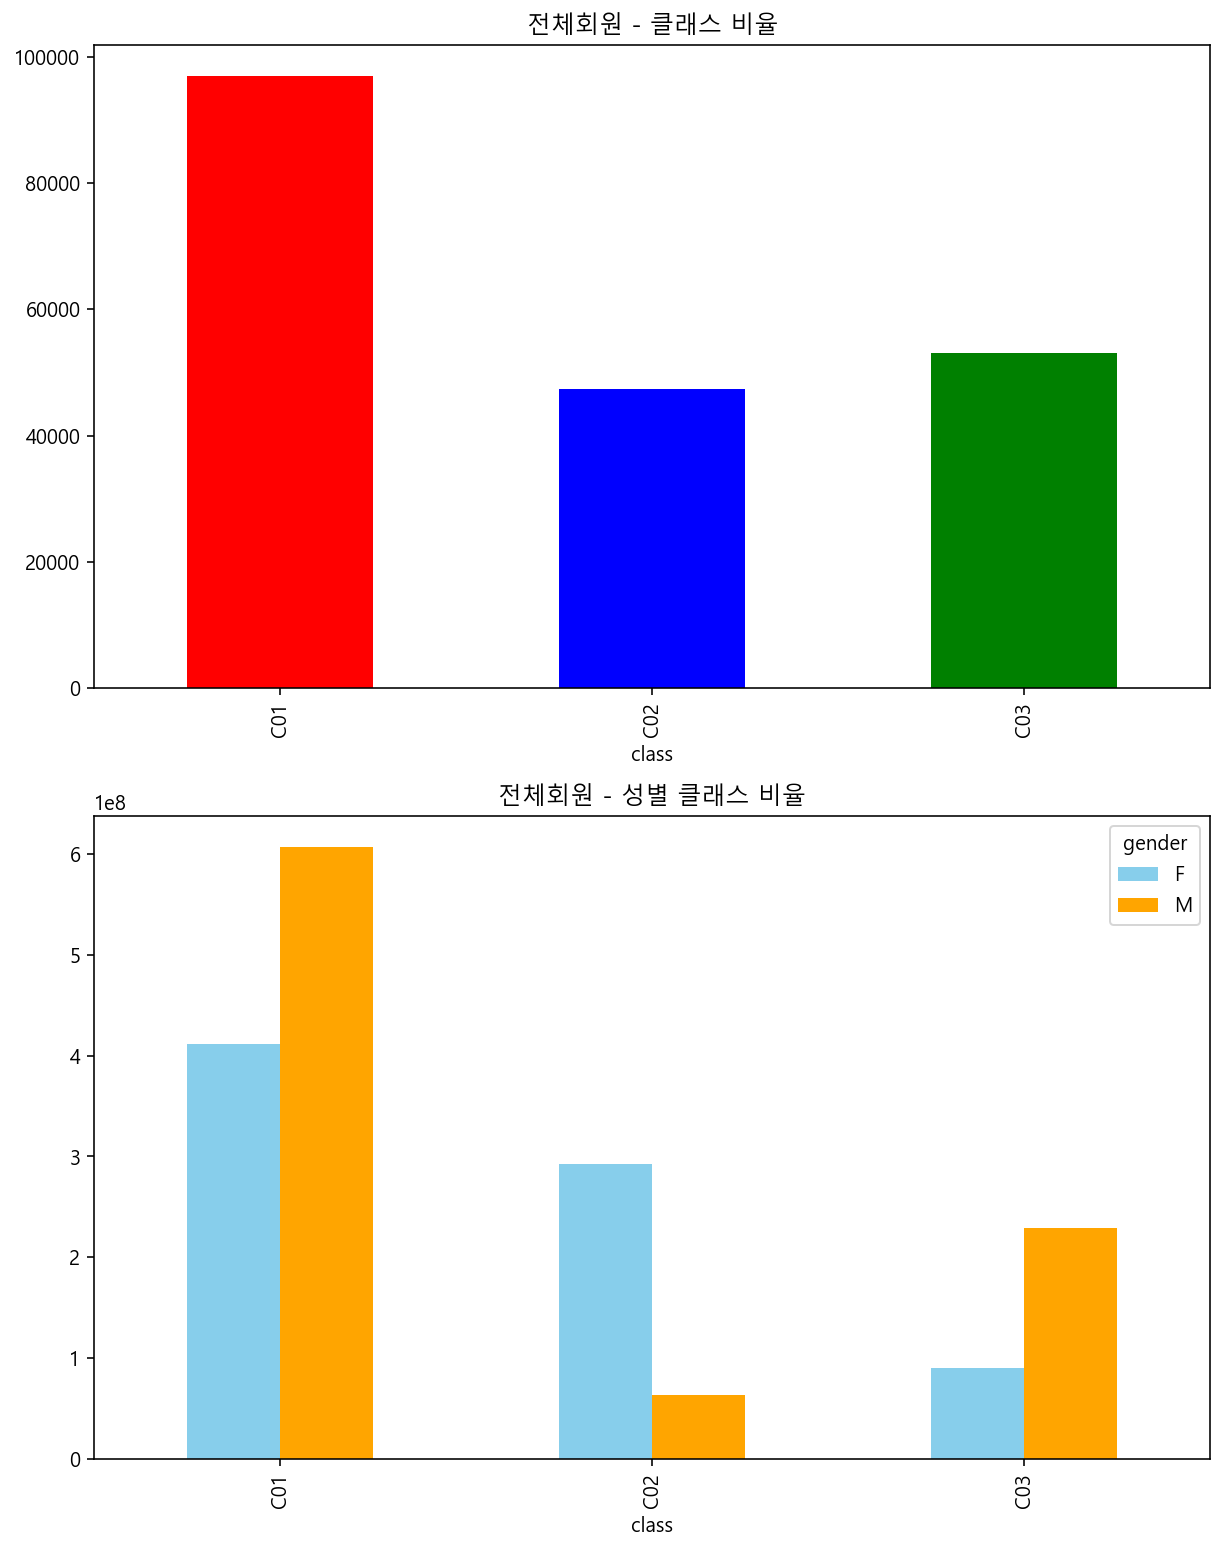

In [10]:
#전체 고객 클래스 비율
fig = plt.figure(figsize = [10,13])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
print(data.groupby(['gender','class'])['customer_id'].count())
axes1.set_title('전체회원 - 클래스 비율')
axes2.set_title('전체회원 - 성별 클래스 비율')
data.groupby(['class'])['customer_id'].count().plot.bar(color=['r','b','g'],ax=axes1)
pd.pivot_table(data=data,index='class',columns='gender',values='price',aggfunc=sum).plot.bar(color=['skyblue','orange'],ax=axes2)

gender  class
F       C01      6283
        C02      5554
        C03      1821
M       C01      8716
        C02      1638
        C03      5462
Name: customer_id, dtype: int64


<AxesSubplot:title={'center':'탈퇴회원 - 성별 클래스 비율'}, xlabel='class'>

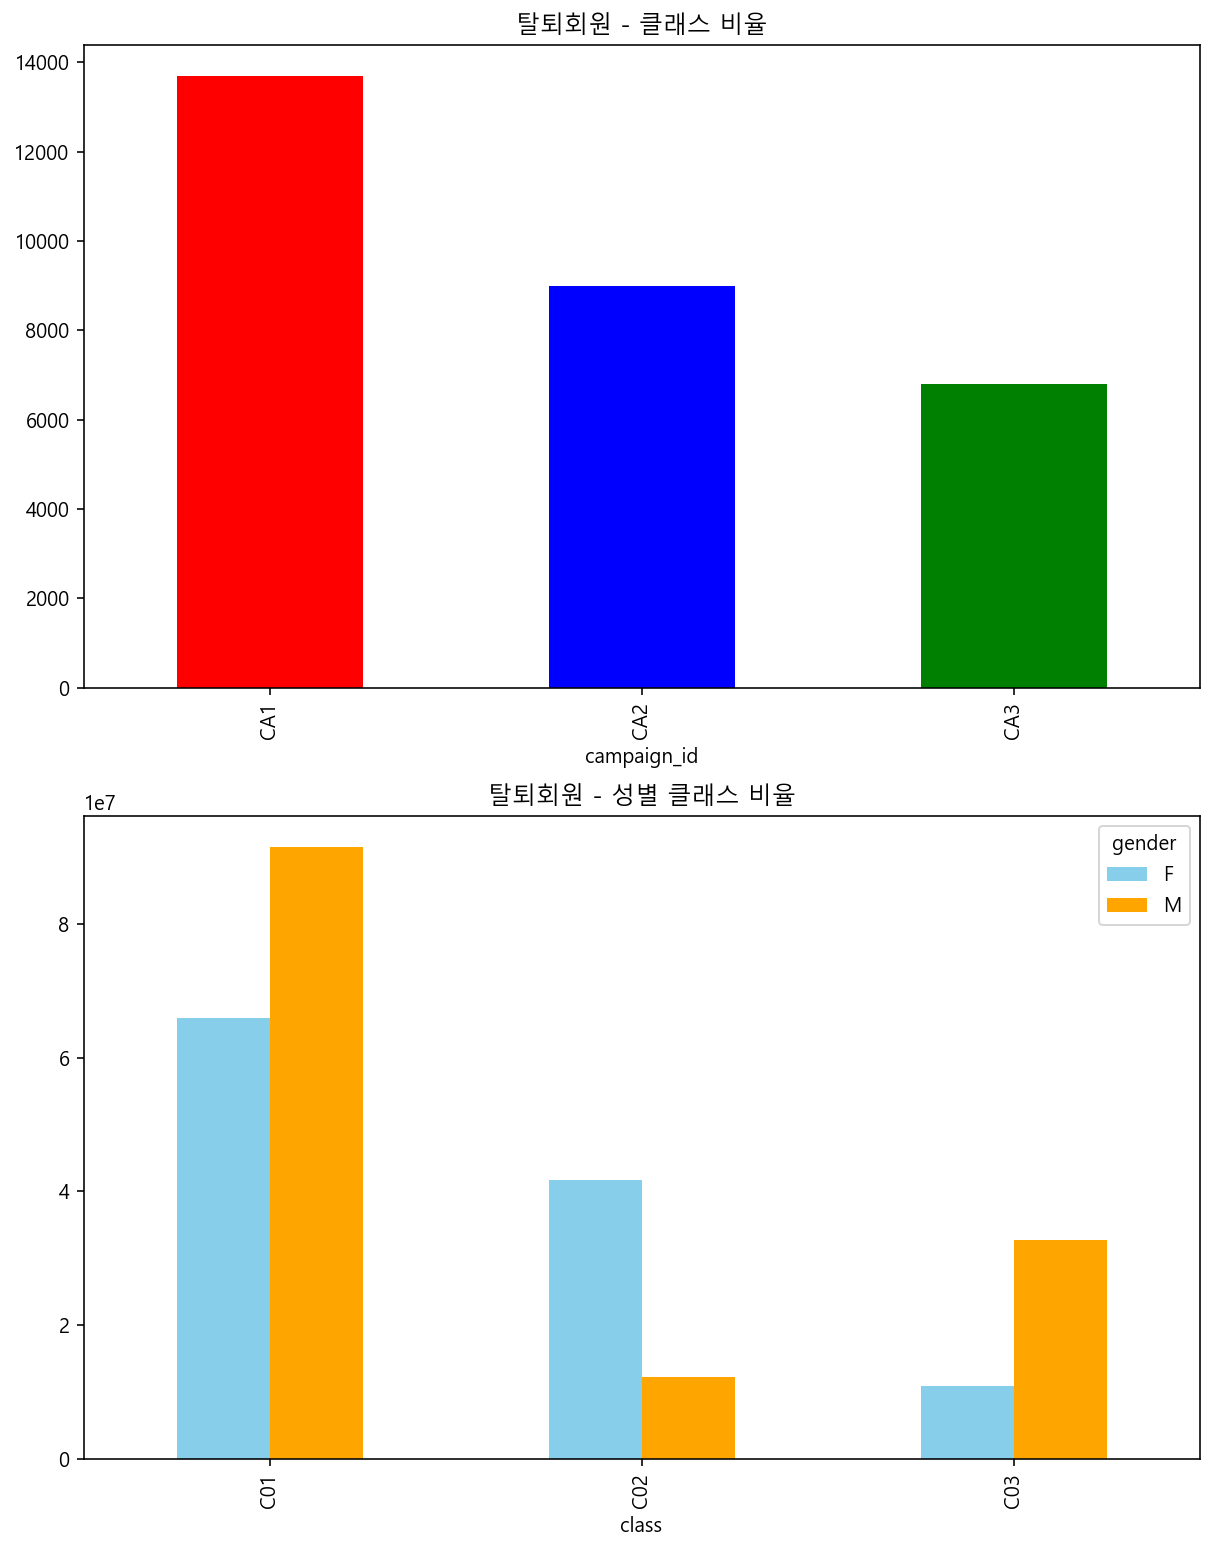

In [11]:
#탈퇴회원 클래스 비율
fig = plt.figure(figsize = [10,13])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
print(customer_end.groupby(['gender','class'])['customer_id'].count())
axes1.set_title('탈퇴회원 - 클래스 비율')
axes2.set_title('탈퇴회원 - 성별 클래스 비율')
customer_end.groupby(['campaign_id'])['class'].count().plot.bar(color=['r','b','g'],ax=axes1)
pd.pivot_table(data=customer_end,index='class',columns='gender',values='price',aggfunc=sum).plot.bar(color=['skyblue','orange'],ax=axes2)

gender  class
F       C01      1422
        C02      1302
        C03       430
M       C01      1687
        C02       322
        C03       999
Name: customer_id, dtype: int64


<AxesSubplot:title={'center':'탈퇴회원 - 1년이상 - 성별 클래스 비율'}, xlabel='class'>

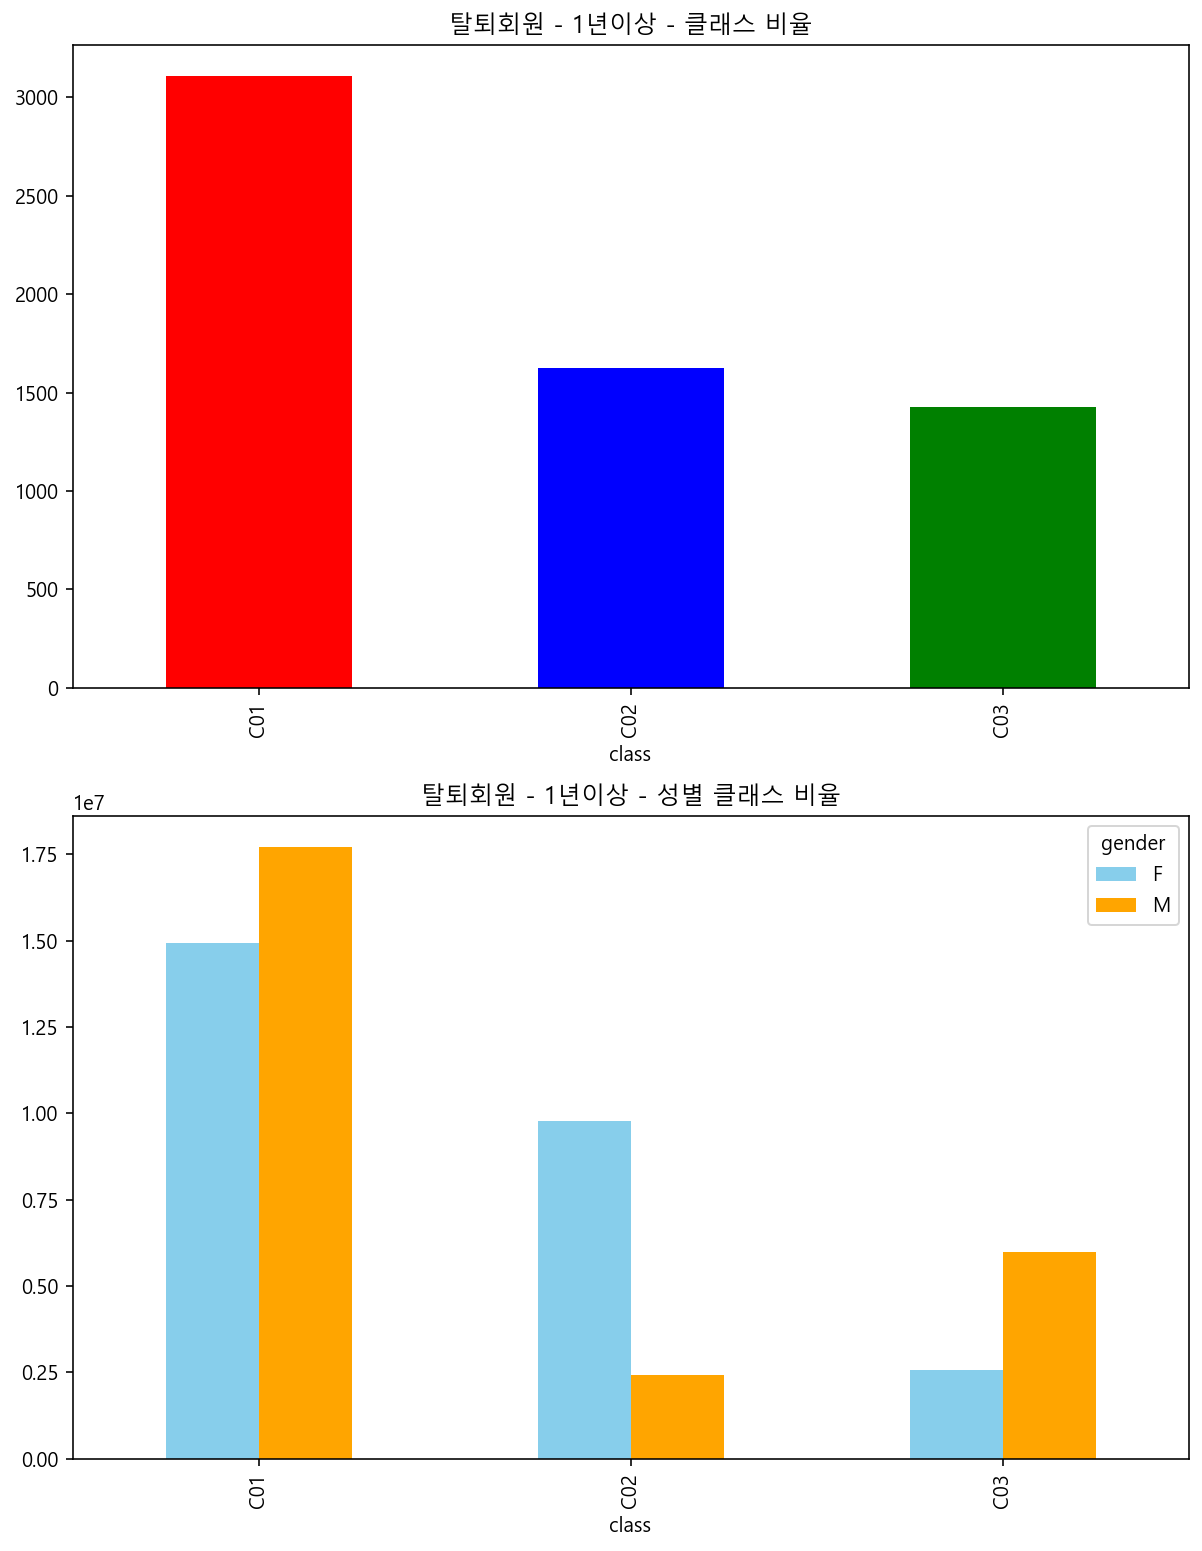

In [12]:
#탈퇴회원 중 1년 이상된 사람들의 클래스 비율
fig = plt.figure(figsize = [10,13])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
print(end_over_365.groupby(['gender','class'])['customer_id'].count())
axes1.set_title('탈퇴회원 - 1년이상 - 클래스 비율')
axes2.set_title('탈퇴회원 - 1년이상 - 성별 클래스 비율')
end_over_365.groupby(['class'])['customer_id'].count().plot.bar(color=['r','b','g'],ax=axes1)
pd.pivot_table(data=end_over_365,index='class',columns='gender',values='price',aggfunc=sum).plot.bar(color=['skyblue','orange'],ax=axes2)

gender  class
F       C01      4861
        C02      4252
        C03      1391
M       C01      7029
        C02      1316
        C03      4463
Name: customer_id, dtype: int64


<AxesSubplot:title={'center':'탈퇴회원 - 1년미만 - 성별 클래스 비율'}, xlabel='class'>

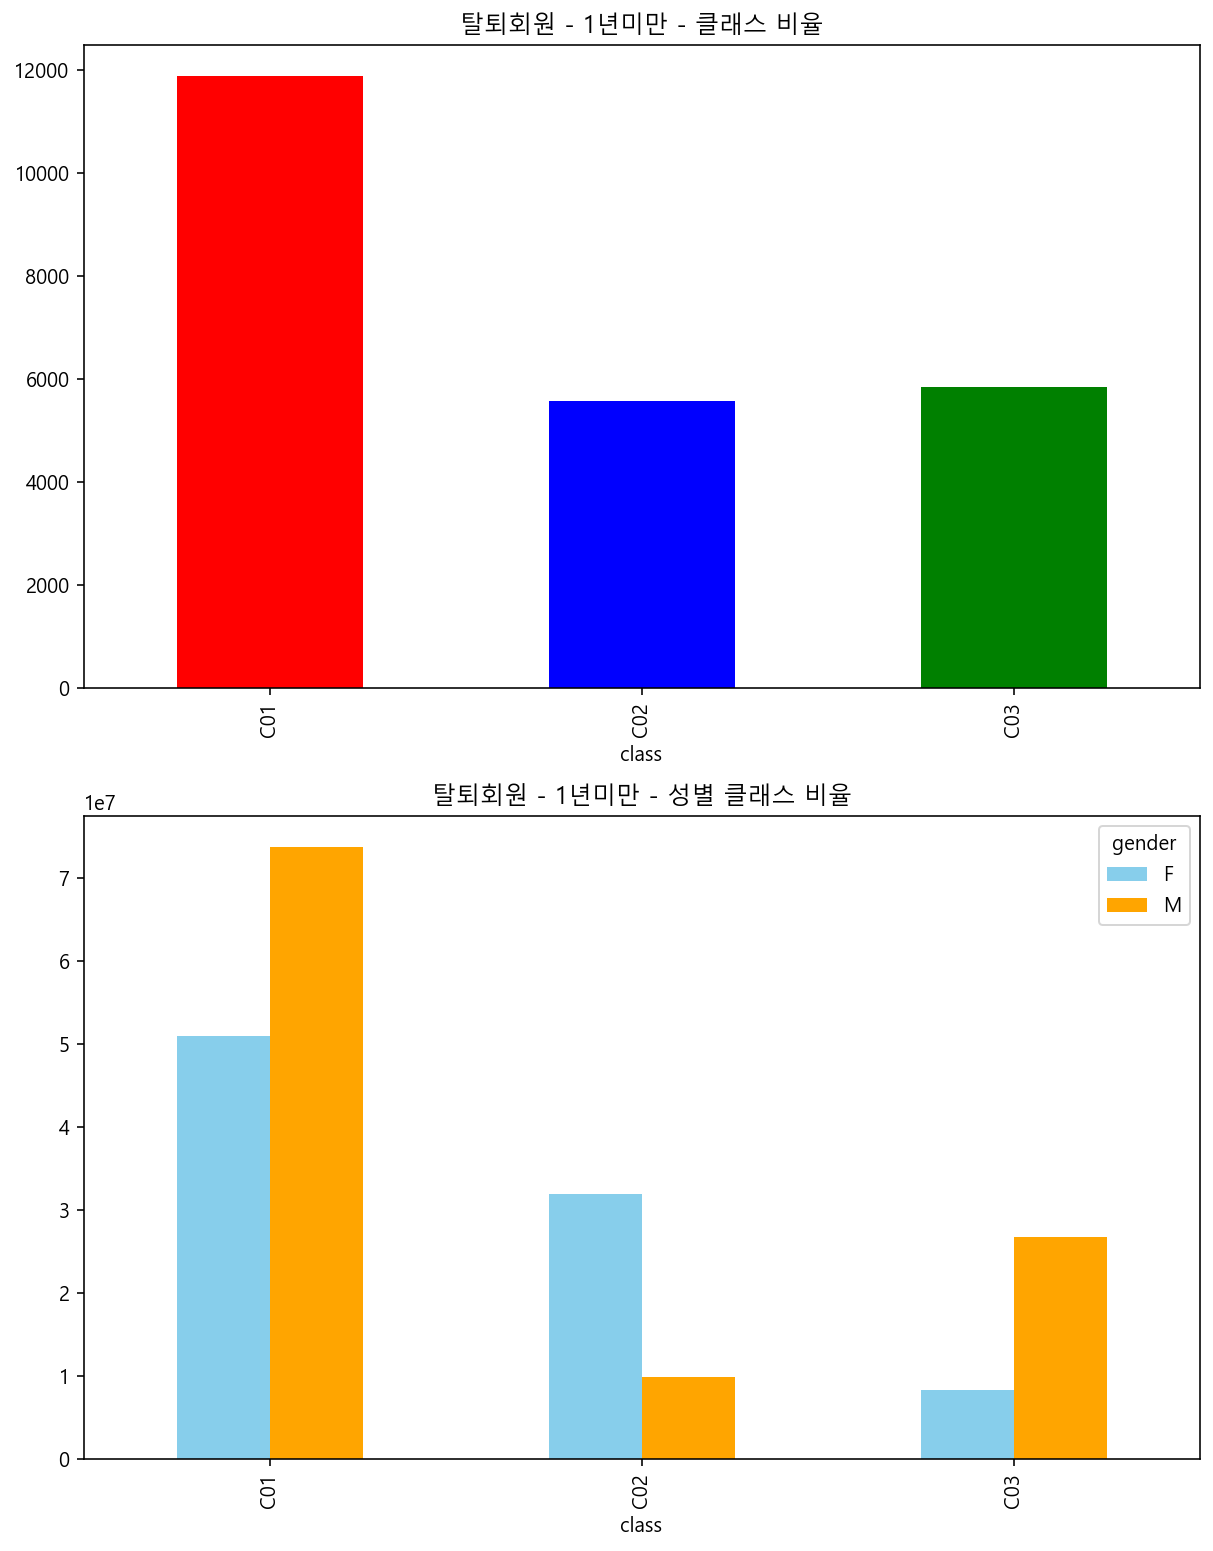

In [13]:
#탈퇴회원 중 1년 미만인 사람들의 클래스 비율
fig = plt.figure(figsize = [10,13])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
print(end_under_365.groupby(['gender','class'])['customer_id'].count())
axes1.set_title('탈퇴회원 - 1년미만 - 클래스 비율')
axes2.set_title('탈퇴회원 - 1년미만 - 성별 클래스 비율')
end_under_365.groupby(['class'])['customer_id'].count().plot.bar(color=['r','b','g'],ax=axes1)
pd.pivot_table(data=end_under_365,index='class',columns='gender',values='price',aggfunc=sum).plot.bar(color=['skyblue','orange'],ax=axes2)

### -월별 가입률
 - 여성이 적을때 남성 가입이 많을때가 있고, 여성이 많을때 남성이 적을때가 있지만 성별과 월별 가입률과는 상관관계가 없다고 할수있다. 
 - 계절은 매출과 상관관계가 없다.
 - 탈퇴율에서도 알 수 있듯이 19년도에 이르러 급격한 매출감소가 일어나고 있다.

C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


start_month
201505    29458500
201506    31858500
201507    23542500
201508    24324000
201509    34920000
Name: price, dtype: int64


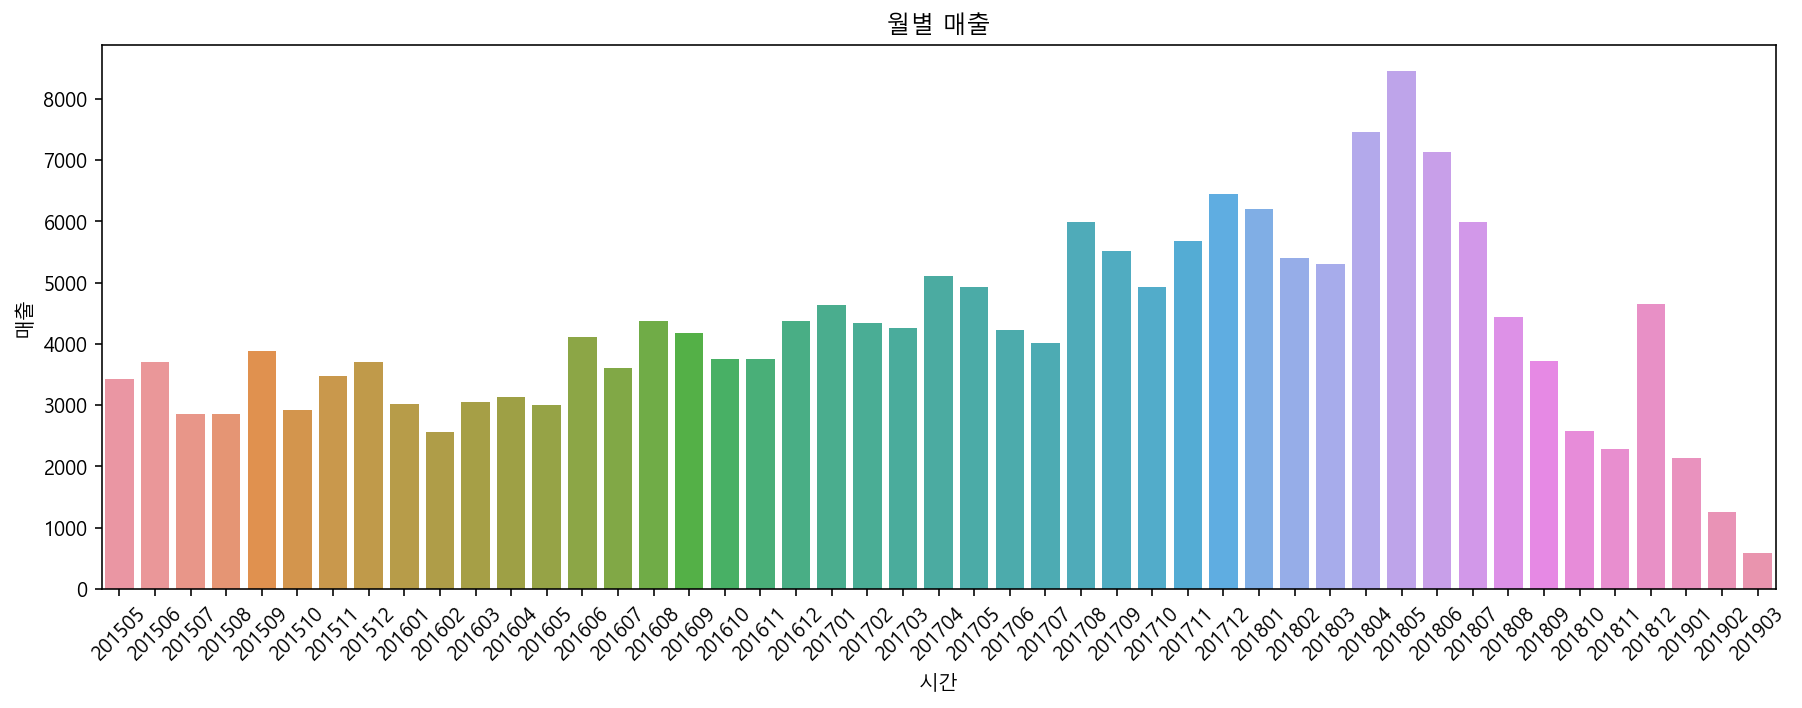

In [14]:
# 월별매출


fig = plt.figure(figsize = [15,5])
plt.xticks(rotation=45)
price_chart=sns.countplot(data['start_month'])
price_chart.set_title('월별 매출')
price_chart.set_xlabel('시간')
price_chart.set_ylabel('매출')

#월별 총합
print(data.groupby('start_month')['price'].sum().head())

C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


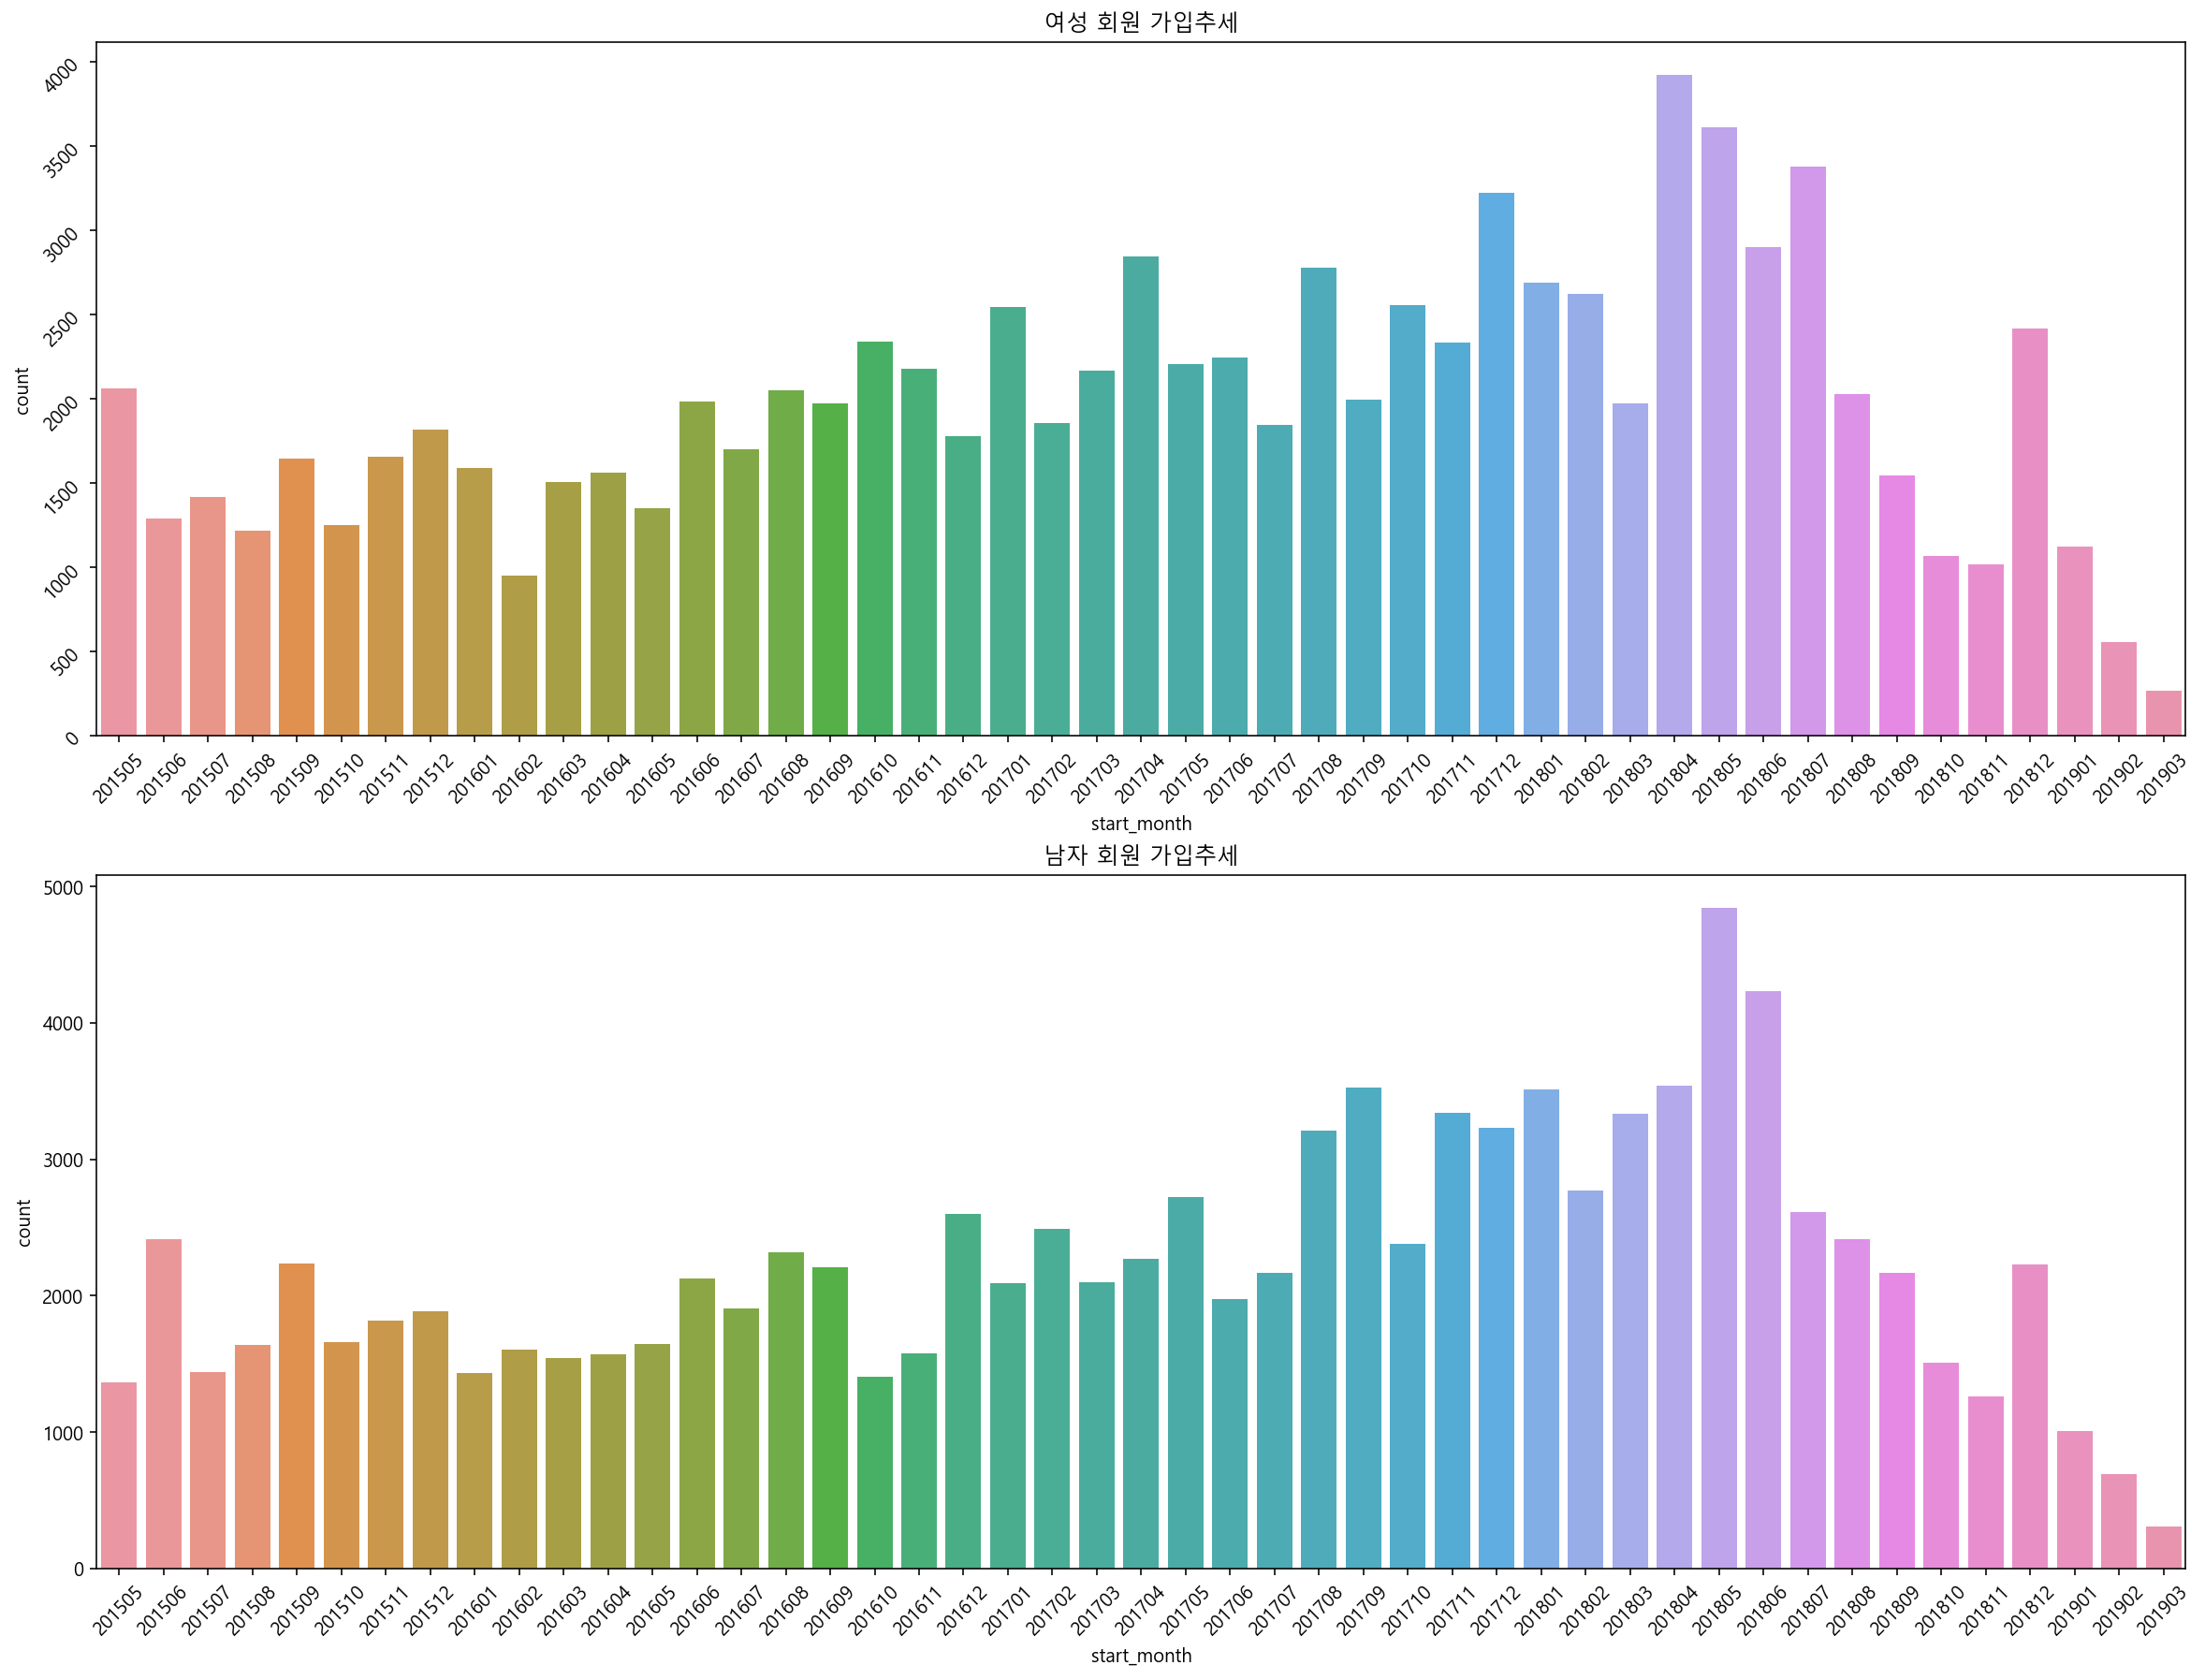

In [15]:
dataf=data[data['gender']=='F']
datam=data[data['gender']=='M']

fig = plt.figure(figsize = [20,15])

axes1=fig.add_subplot(2,1,1)
axes2=fig.add_subplot(2,1,2)
plt.xticks(rotation=45)
female_cahrt=sns.countplot(dataf['start_month'],ax=axes1)

male_chart=sns.countplot(datam['start_month'],ax=axes2)
axes1.set_title('여성 회원 가입추세')
axes2.set_title('남자 회원 가입추세')
axes1.tick_params(rotation=45)

### -탈퇴율
 - 탈퇴 회원들의 평균 스포츠 센터 이용기간은 288일이다.
 - 겨울로 갈수록 탈퇴 회원 수는 늘어난다.
 - 곧 기간 만료되는 2월 중 탈퇴 신청한 고객들이 가입했던 캠페인을 보아 할인행사로 가입했던 고객이 많으므로 탈퇴를 막기위해 3월 탈퇴 고객 대상으로 캠페인 행사나 회원권 할인 등 행사 프로모션을 하면 좋을것 같다.

In [16]:
print(customer_end['total_use'].mean())

288 days 17:11:15.931329308


campaign_id
CA1    1982
CA2    1360
CA3     971
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='campaign_id'>

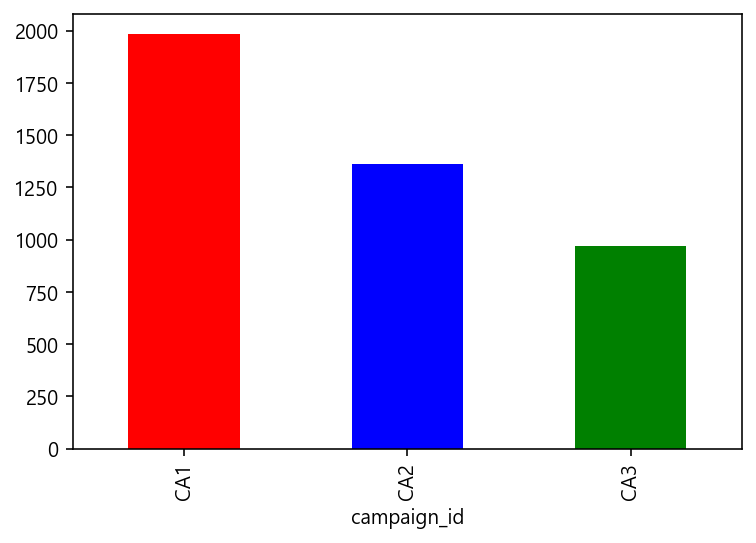

In [17]:
# 2월에 탈퇴를 신청한 고객의 가입 캠페인
print(customer_end_feb.groupby('campaign_id')['customer_id'].count())
customer_end_feb.groupby('campaign_id')['customer_id'].count().plot.bar(color=['r','b','g'])

C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='end_month', ylabel='count'>

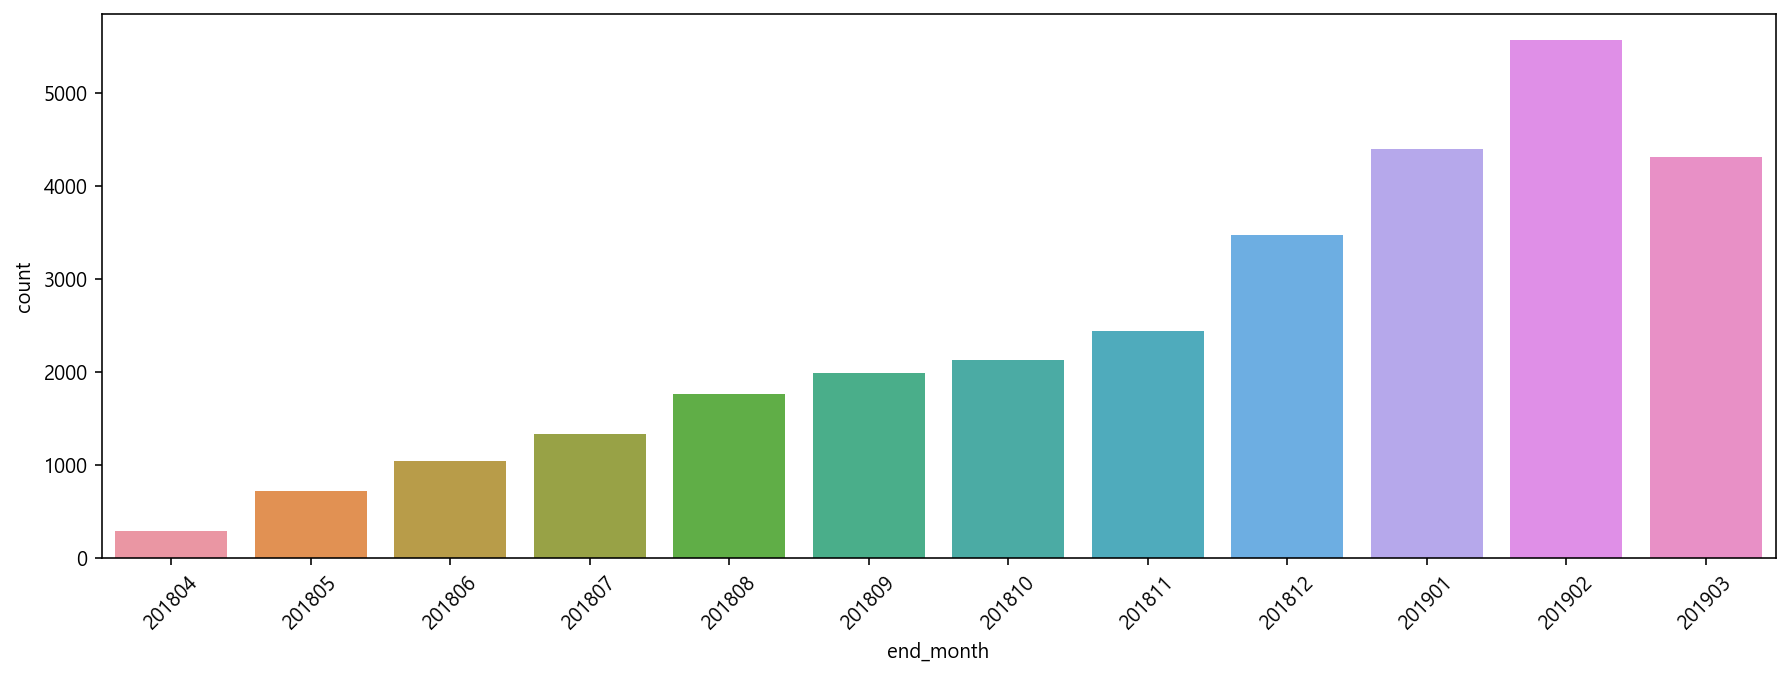

In [18]:
# 월별 탈퇴 현황

fig = plt.figure(figsize = [15,5])
plt.xticks(rotation=45)
sns.countplot(customer_end2['end_month'])

C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

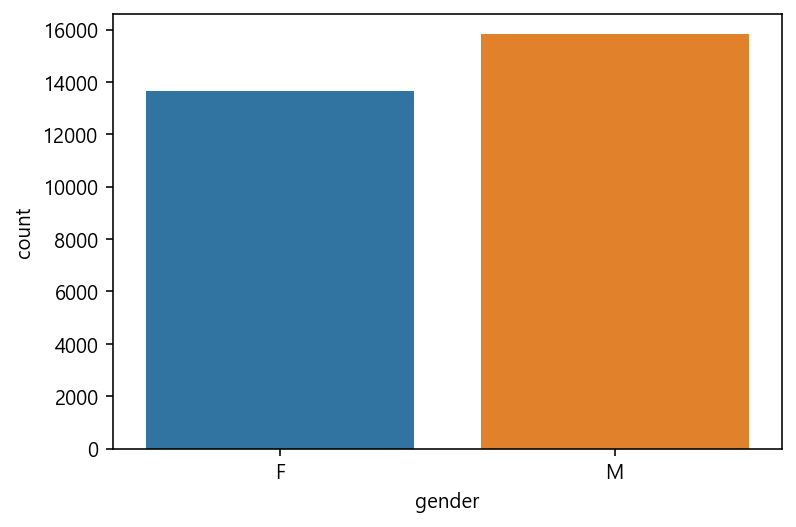

In [19]:
#탈퇴한 회원의 성비
sns.countplot(customer_end['gender'])